In [1]:
import PySimpleGUI as sg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import itertools
from measurementModel import genDNA, get_hist


In [2]:
from baseSeqExtract import DNAExtract

In [3]:
DNAstring_lookup = {0: 'A', 1:'T', 2:'G', 3:'C'}
seq_lookup = {'A': 0, 'T': 1, 'G':2, 'C': 3}

def DNA_to_seq(DNA_string):
    return np.array([seq_lookup[c] for c in DNA_string])

def seq_to_DNA(sequence):
    return ''.join([DNAstring_lookup[i] for i in sequence])

def check_string(string, character_list):
    """Check whether any characters in string are not in character_list"""
    for c in string:
        if c not in character_list:
            return False
    return True

## Run the below cell for the generation model program

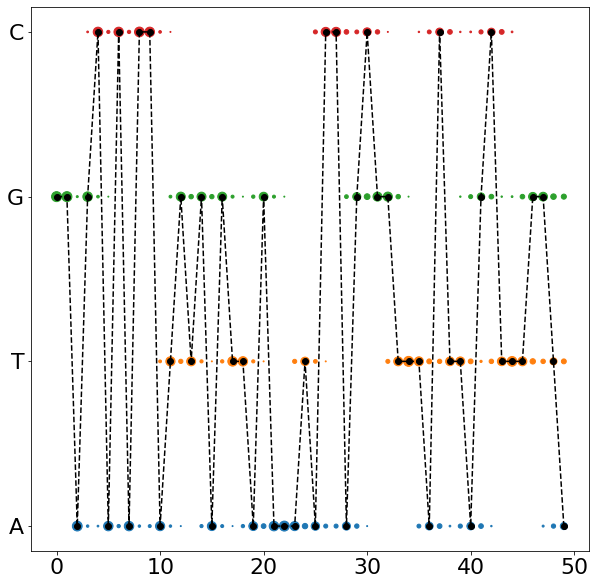

In [4]:

_VARS = {'window': False,
         'fig_agg': False,
         'pltFig': False,
         'incorp_err': .01,
         'dark_err': .008,
         'cleave_err': .001,
         'num_seq': 100,
         'base_string': seq_to_DNA(np.random.randint(0, 4, 100))}



# Helper Functions


def draw_figure(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
    return figure_canvas_agg


# \\  -------- PYSIMPLEGUI -------- //

AppFont = 'Any 16'
SliderFont = 'Any 14'
sg.theme('black')
plt.rcParams.update({'font.size': 22})
# New layout with slider and padding

layout = [[sg.Canvas(key='figCanvas',)],
          [sg.Text(text="DNA Sequence:",
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(size=(34, 20),
                     default_text=_VARS['base_string'],
                     #background_color='#ffffff',
                     font=SliderFont,
                     pad=((0, 0), (10, 0)),
                     #text_color = 'Black',
                     key='DNA_SEQ',
                     enable_events=True),
           sg.Button('Generate',
                     font=AppFont,
                     pad=((4, 0), (10, 0)))],
          [sg.Text(text = 'Incorporation Error :',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'INCORP_ERR', size = (5,5), default_text = _VARS['incorp_err'], pad=((0, 0), (10, 0)), enable_events=True),
           sg.Text(text = 'Cleave Error :',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'CLEAVE_ERR', size = (5,5), default_text = _VARS['cleave_err'], pad=((0, 0), (10, 0)), enable_events=True),
           sg.Text(text = 'Dark Error :',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'DARK_ERR', size = (5,5), default_text = _VARS['dark_err'], pad=((0, 0), (10, 0)), enable_events=True),],
           [sg.Text(text = 'Number of measured sequences :',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'NUM_SEQ', size = (5,5), default_text = _VARS['num_seq'], pad=((0, 0), (10, 0)), enable_events=True),],
          # pad ((left, right), (top, bottom))
          [sg.Button('Exit', font=AppFont, pad=((540, 0), (0, 0)))]]

_VARS['window'] = sg.Window('DNA Error generation',
                            layout,
                            finalize=True,
                            resizable=True,
                            location=(100, 100),
                            element_justification="center",
                            background_color='#ffffff')
#_VARS['window']['-Slider-'].bind('<ButtonRelease-1>', ' Release')

# \\  -------- PYSIMPLEGUI -------- //


# \\  -------- PYPLOT -------- //


def plotFig():
    hist = get_hist(genDNA(DNA_to_seq(_VARS['base_string']), _VARS['incorp_err'], _VARS['cleave_err'], _VARS['dark_err'], _VARS['num_seq']))
    num = len(hist[0,:])
    normalization = 100/np.sum(hist[:,0])
    plt.scatter(range(num), np.zeros(num), s = normalization*hist[0,:])
    plt.scatter(range(num), np.zeros(num)+1, s = normalization*hist[1,:])
    plt.scatter(range(num), np.zeros(num)+2, s = normalization*hist[2,:])
    plt.scatter(range(num), np.zeros(num)+3, s = normalization*hist[3,:])
    plt.plot(range(num), DNA_to_seq(_VARS['base_string'])[:num], 'ko--')
    _yticks = [0,1,2,3]
    ytick_labels = ['A','T','G','C']
    _VARS['pltFig'].axes[0].set_yticks(_yticks)
    _VARS['pltFig'].axes[0].set_yticklabels(ytick_labels, minor=False)
    
    _VARS['fig_agg'] = draw_figure(
        _VARS['window']['figCanvas'].TKCanvas, _VARS['pltFig'])
    return


def drawChart():
    _VARS['pltFig'] = plt.figure(figsize = (10,10))
    #dataXY = makeSynthData()
    #plt.plot(dataXY[0], dataXY[1], '.k')
    plotFig()
    return

def updateChart():
    _VARS['fig_agg'].get_tk_widget().forget()
    plt.clf()
    plotFig()
    return
    
def updateData(val):
    #_VARS['dataSize'] = int(val['-Slider-'])
    _VARS['incorp_err'] = float(val['INCORP_ERR'])
    _VARS['cleave_err'] = float(val['CLEAVE_ERR'])
    _VARS['dark_err'] = float(val['DARK_ERR'])
    _VARS['base_string'] = val['DNA_SEQ']
    _VARS['num_seq'] = int(val['NUM_SEQ'])
    updateChart()

# \\  -------- PYPLOT -------- //


drawChart()

# MAIN LOOP
while True:
    event, values = _VARS['window'].read(timeout=200)
    if event == sg.WIN_CLOSED or event == 'Exit':
        break
    elif event == 'Generate':
        updateData(values)
        #updateChart()
        
    #elif event == '-Slider- Release':
        #updateData(int(values['-Slider-']))
    #    updateData(values)
    if event == 'INCORP_ERR' and values['INCORP_ERR'] and not check_string(values['INCORP_ERR'],'0123456789.-'):
        _VARS['window']['INCORP_ERR'].update(''.join([c for c in values['INCORP_ERR'] if c in '0123456789.-']))
    if event == 'DARK_ERR' and values['DARK_ERR'] and not check_string(values['DARK_ERR'],'0123456789.-'):
        _VARS['window']['DARK_ERR'].update(''.join([c for c in values['DARK_ERR'] if c in '0123456789.-']))
    if event == 'CLEAVE_ERR' and values['CLEAVE_ERR'] and not check_string(values['CLEAVE_ERR'],'0123456789.-'):
        _VARS['window']['CLEAVE_ERR'].update(''.join([c for c in values['CLEAVE_ERR'] if c in '0123456789.-']))
    if event == 'NUM_SEQ' and values['NUM_SEQ'] and not check_string(values['NUM_SEQ'],'0123456789'):
        _VARS['window']['NUM_SEQ'].update(''.join([c for c in values['NUM_SEQ'] if c in '0123456789']))
    if event == 'DNA_SEQ' and values['DNA_SEQ'] and not check_string(values['DNA_SEQ'], 'ATGC'):
        #_VARS['window']['DNA_SEQ'].update(values['DNA_SEQ'][:-1])
        _VARS['window']['DNA_SEQ'].update(''.join([c for c in values['DNA_SEQ'] if c in 'ATGC']))

_VARS['window'].close()

## Run the below cell for the base sequence extraction simulation

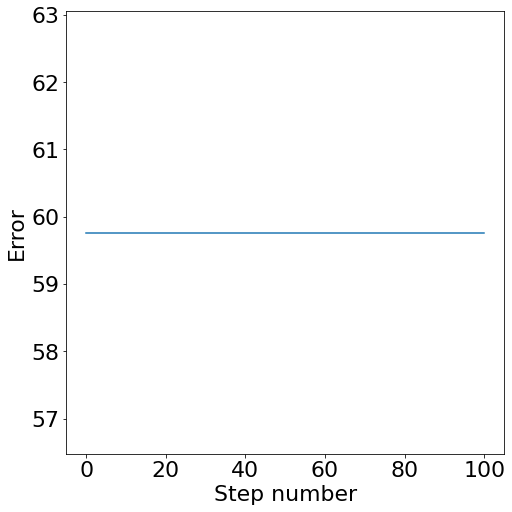

In [5]:
# VARS CONSTS:
# Upgraded dataSize to global...
_VARS = {'window': False,
         'fig_agg': False,
         'pltFig': False,
         'incorp_err': .01,
         'dark_err': .008,
         'cleave_err': .001,
         'num_step': 100,
         'win_len': 1,
         'num_avg': 3,
         'base_string': seq_to_DNA(np.random.randint(0, 4, 100)),
         'pred_seq': '',
         'edit_dist': False}



# Helper Functions


def draw_figure(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
    return figure_canvas_agg


# \\  -------- PYSIMPLEGUI -------- //

AppFont = 'Any 16'
SliderFont = 'Any 14'
sg.theme('black')
plt.rcParams.update({'font.size': 22})
# New layout with slider and padding

layout = [[sg.Canvas(key='figCanvas', size = (8*72, 8*72))],
          [sg.Text(text="Base DNA Sequence:",
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(size=(50, 20),
                     default_text=_VARS['base_string'],
                     #background_color='#ffffff',
                     font=SliderFont,
                     pad=((0, 0), (10, 0)),
                     #text_color = 'Black',
                     key='DNA_SEQ',
                     enable_events=True),
            sg.Button('Calculate',
                     font=AppFont,
                     pad=((4, 0), (10, 0)))],
           [sg.Text(text="Predicted DNA Sequence:",
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Text(text='',
                     background_color='#ffffff',
                     font=SliderFont,
                     pad=((0, 0), (10, 0)),
                     text_color = 'Black',
                     key='PRED_SEQ',
                     enable_events=True),],
          [sg.Text(text='',
                     background_color='#ffffff',
                     font=SliderFont,
                     pad=((0, 0), (10, 0)),
                     text_color = 'Black',
                     key='EDIT_DIST',),],
          [sg.Text(text = 'Incorporation Error :',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'INCORP_ERR', size = (5,5), default_text = _VARS['incorp_err'], pad=((0, 0), (10, 0)), enable_events=True),
           sg.Text(text = 'Cleave Error :',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'CLEAVE_ERR', size = (5,5), default_text = _VARS['cleave_err'], pad=((0, 0), (10, 0)), enable_events=True),
           sg.Text(text = 'Dark Error :',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'DARK_ERR', size = (5,5), default_text = _VARS['dark_err'], pad=((0, 0), (10, 0)), enable_events=True),],
           [sg.Text(text = 'Number of steps:',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'NUM_STEP', size = (5,5), default_text = _VARS['num_step'], pad=((0, 0), (10, 0)), enable_events=True),
           sg.Text(text = 'Window length:',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'WIN_LEN', size = (5,5), default_text = _VARS['win_len'], pad=((0, 0), (10, 0)), enable_events=True),
           sg.Text(text = 'Number of averages per step:',
                   font=SliderFont,
                   background_color='#ffffff',
                   pad=((0, 0), (10, 0)),
                   text_color='Black'),
           sg.Input(key = 'NUM_AVG', size = (5,5), default_text = _VARS['num_avg'], pad=((0, 0), (10, 0)), enable_events=True),],
          # pad ((left, right), (top, bottom))
          [sg.Button('Exit', font=AppFont, pad=((540, 0), (0, 0)))]]

_VARS['window'] = sg.Window('DNA Sequence Extraction',
                            layout,
                            finalize=True,
                            resizable=True,
                            location=(100, 100),
                            element_justification="center",
                            background_color='#ffffff')
#_VARS['window']['-Slider-'].bind('<ButtonRelease-1>', ' Release')

# \\  -------- PYSIMPLEGUI -------- //


# \\  -------- PYPLOT -------- //


def plotFig():
    #hist = get_hist(genDNA(DNA_to_seq(_VARS['base_string']), _VARS['incorp_err'], _VARS['cleave_err'], _VARS['dark_err'], _VARS['num_seq']))
    DNAex = DNAExtract(genDNA(DNA_to_seq(_VARS['base_string']), _VARS['incorp_err'], _VARS['cleave_err'], _VARS['dark_err']), _VARS['incorp_err'], _VARS['cleave_err'], _VARS['dark_err'])
    DNAex.base_seq_extract(_VARS['win_len'], _VARS['num_avg'], _VARS['num_step'])
    _VARS['window']['PRED_SEQ'].update(seq_to_DNA(DNAex.pred_DNA))
    _VARS['window']['EDIT_DIST'].update('Edit Distance: ' + str(DNAex.DL_dist_nosub(seq_to_DNA(DNAex.pred_DNA), _VARS['base_string'][:(len( _VARS['base_string'])//2)])))
    plt.plot(range(len(DNAex.errors)), np.sqrt(DNAex.errors))
    plt.xlabel('Step number')
    plt.ylabel('Error')
    
    _VARS['fig_agg'] = draw_figure(
        _VARS['window']['figCanvas'].TKCanvas, _VARS['pltFig'])
    return


def drawChart():
    _VARS['pltFig'] = plt.figure(figsize = (7,7), constrained_layout = True)

    plotFig()
    return

def updateChart():
    _VARS['fig_agg'].get_tk_widget().forget()
    plt.clf()
    plotFig()
    return
    
def updateData(val):
    #_VARS['dataSize'] = int(val['-Slider-'])
    _VARS['incorp_err'] = float(val['INCORP_ERR'])
    _VARS['cleave_err'] = float(val['CLEAVE_ERR'])
    _VARS['dark_err'] = float(val['DARK_ERR'])
    _VARS['base_string'] = val['DNA_SEQ']
    _VARS['num_step'] = int(val['NUM_STEP'])
    _VARS['num_avg'] = int(val['NUM_AVG'])
    updateChart()

# \\  -------- PYPLOT -------- //


drawChart()

# MAIN LOOP
while True:
    event, values = _VARS['window'].read(timeout=200)
    if event == sg.WIN_CLOSED or event == 'Exit':
        break
    elif event == 'Calculate':
        updateData(values)
        #updateChart()
        
    #elif event == '-Slider- Release':
        #updateData(int(values['-Slider-']))
    #    updateData(values)
    if event == 'INCORP_ERR' and values['INCORP_ERR'] and not check_string(values['INCORP_ERR'],'0123456789.-'):
        _VARS['window']['INCORP_ERR'].update(''.join([c for c in values['INCORP_ERR'] if c in '0123456789.-']))
    if event == 'DARK_ERR' and values['DARK_ERR'] and not check_string(values['DARK_ERR'],'0123456789.-'):
        _VARS['window']['DARK_ERR'].update(''.join([c for c in values['DARK_ERR'] if c in '0123456789.-']))
    if event == 'CLEAVE_ERR' and values['CLEAVE_ERR'] and not check_string(values['CLEAVE_ERR'],'0123456789.-'):
        _VARS['window']['CLEAVE_ERR'].update(''.join([c for c in values['CLEAVE_ERR'] if c in '0123456789.-']))
    if event == 'NUM_STEP' and values['NUM_STEP'] and not check_string(values['NUM_STEP'],'0123456789'):
        _VARS['window']['NUM_STEP'].update(''.join([c for c in values['NUM_STEP'] if c in '0123456789']))
    if event == 'WIN_LEN' and values['WIN_LEN'] and not check_string(values['WIN_LEN'], '0123456789'):
        _VARS['window']['WIN_LEN'].update(''.join([c for c in values['WIN_LEN'] if c in '0123456789']))
    if event == 'NUM_AVG' and values['NUM_AVG'] and not check_string(values['NUM_AVG'], '0123456789'):
        _VARS['window']['NUM_AVG'].update(''.join([c for c in values['NUM_AVG'] if c in '0123456789']))
    if event == 'DNA_SEQ' and values['DNA_SEQ'] and not check_string(values['DNA_SEQ'], 'ATGC'):
        #_VARS['window']['DNA_SEQ'].update(values['DNA_SEQ'][:-1])
        _VARS['window']['DNA_SEQ'].update(''.join([c for c in values['DNA_SEQ'] if c in 'ATGC']))

_VARS['window'].close()